# DATA EXPLORATORY Analysis ON COVID CASES!

In [1]:
# What's going right now ! 
# We connect to https://opencovid.ca/api/ as an active API to fetch online data
import requests
import json
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import tensorflow as tf 
response = requests.get('https://api.opencovid.ca/')
data = json.loads(response.text)
data =response.json()

In [5]:
# Last update of the data! 
time = list(data.values())
Last_update = time[1]
print(Last_update)

2022-03-24 21:38 EDT


In [24]:
data_list = list(data.values())
data_dict = dict(data_list[0][0])
active_cases = data_dict['active_cases']
death = data_dict['deaths']
recovered = data_dict['recovered']
testing = data_dict['testing']
cases = data_dict['cases']
active_cases
active_case_df = pd.DataFrame({'Active cases': [active_cases], 'Deaths': [death], "Testing":[testing], "recovered":[recovered]}, index=[Last_update])
active_case_df

,Active cases,Deaths,Testing,recovered
2022-03-24 21:38 EDT,121115,49.0,24097.0,4088.0


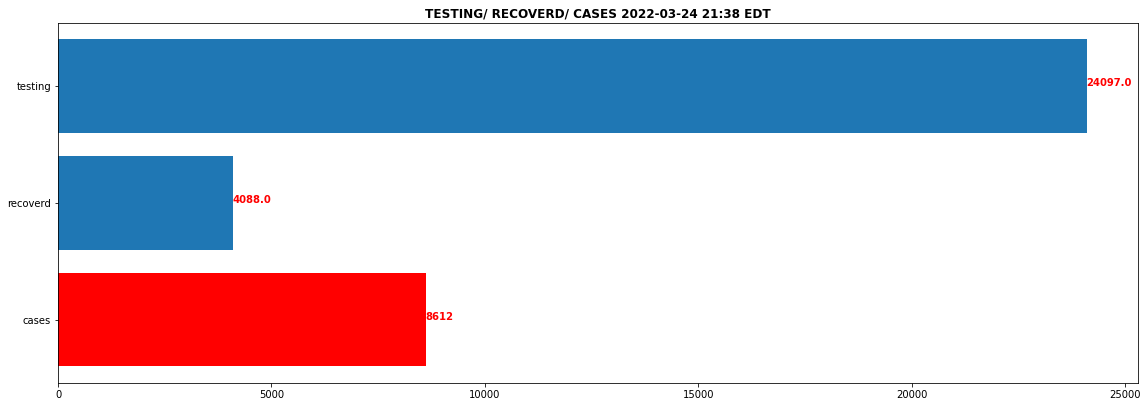

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
leg = ['cases','recoverd','testing']
bar = [cases, recovered, testing ]
ax.barh(leg,bar)
ax.barh('cases',cases, color='red')
for i, v in enumerate(bar): 
    ax.text( v, i,str(v), color='red', fontweight = 'bold')

plt.title("TESTING/ RECOVERD/ CASES " + str(Last_update), fontweight = 'bold' )
plt.show()

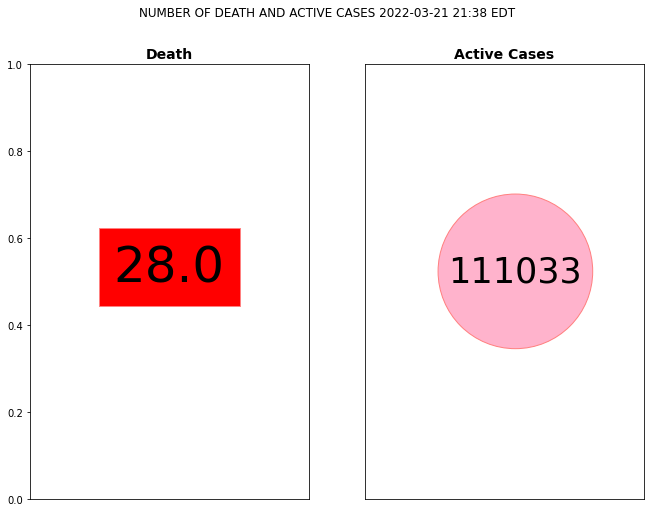

In [5]:
plt.figure(figsize=(11,8))
plt.suptitle("NUMBER OF DEATH AND ACTIVE CASES " +str (Last_update))
plt.subplot(1,2,1)
plt.text(0.3, 0.5, death, size=50,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0, 0),
                   )
         )
plt.title('Death', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.subplot(1,2,2)
plt.text(0.3, 0.5, active_cases, size=35,
         bbox=dict(boxstyle="circle",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.7, 0.8),
                   )
         )
plt.title('Active Cases', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

## Past X days in British Columbia, Canada 

In [6]:
from datetime import date, timedelta
NUMBER_DAYS = 750
PROVINCE = "BC"
today_date = date.today().isoformat()
days_before  =  (date.today() - timedelta(days=NUMBER_DAYS)).isoformat()
response_BC = requests.get("https://api.opencovid.ca/timeseries?stat=cases&loc="+PROVINCE+"&after=" + str(days_before) + "&before=" +str(today_date))
data_BC = json.loads(response_BC.text)
data_BC = response_BC.json()

# WORKING WITH LIST OF DATA !
data_prov_BC = list(data_BC.values())
days = []
for i in range (NUMBER_DAYS): 
    days.append(data_prov_BC[0][i])

cases = [] 
dates=[]
for i in range(NUMBER_DAYS): 
    if days[i]['cases'] != 0 :
        cases.append(days[i]['cases'])
        dates.append(days[i]['date_report'])

cases_df = pd.DataFrame(cases, dates)
cases_df = cases_df.rename(columns={0: "NUMBER OF CASES BC"})
cases_df


,NUMBER OF CASES BC
03-03-2020,4
04-03-2020,1
05-03-2020,8
07-03-2020,6
09-03-2020,5
...,...
15-03-2022,237
16-03-2022,174
17-03-2022,240
18-03-2022,199


In [7]:
# From some days we have no cases ! that is because in those dates we have no testing and report. So we drop those 0 values ! 
cases_df.drop(cases_df.index[cases_df['NUMBER OF CASES BC'] == 0], inplace=True)

In [8]:
# Maximum number of cases!
max_df = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.max(axis=0)[0]]
# Minimum number of cases! 
min_df  = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.min(axis=0)[0]]
max_df, min_df

(            NUMBER OF CASES BC
 03-01-2022                9332,
             NUMBER OF CASES BC
 04-03-2020                   1
 05-06-2020                   1
 03-08-2020                   1
 22-08-2020                   1)

In [9]:
max_df.index[0], min_df.index[0]

('03-01-2022', '04-03-2020')

In [10]:
max_df["NUMBER OF CASES BC"][0], min_df["NUMBER OF CASES BC"][0] 

(9332, 1)

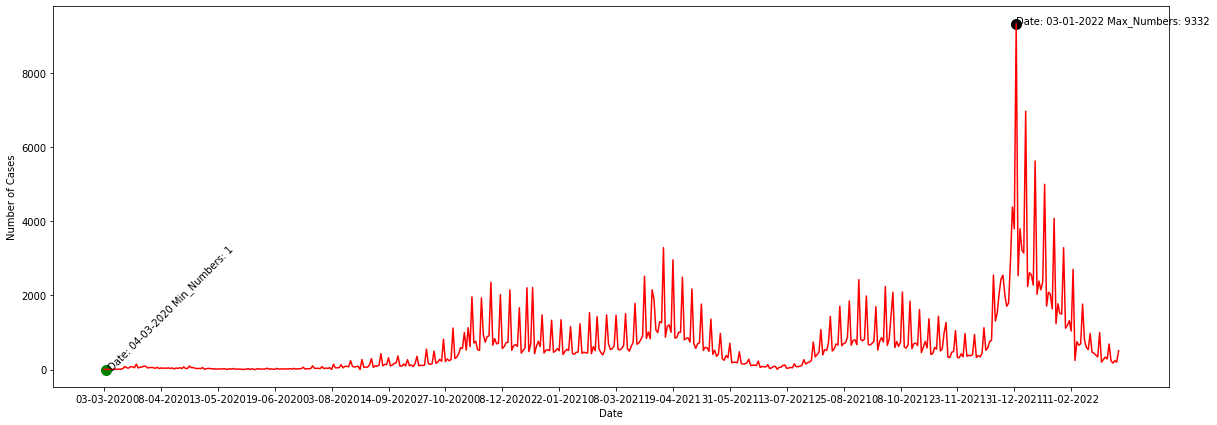

In [11]:
plt.figure(figsize=(20,7))
plt.plot(cases_df, color = "red")
plt.scatter(x = max_df.index[0], y = max_df["NUMBER OF CASES BC"][0], s=100, color="black")
max_title = "Date: " + str(max_df.index[0]) + " Max_Numbers: " +str(max_df["NUMBER OF CASES BC"][0])
plt.annotate(max_title, [max_df.index[0], max_df["NUMBER OF CASES BC"][0]])
plt.scatter(x = min_df.index[0], y =  min_df["NUMBER OF CASES BC"][0], s=100, color = 'Green')
min_title = "Date: " + str(min_df.index[0]) + " Min_Numbers: " + str(min_df["NUMBER OF CASES BC"][0])
plt.annotate(min_title,[min_df.index[0], min_df["NUMBER OF CASES BC"][0]], rotation=45)
plt.xticks(cases_df.index[0:-1:30])
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

<AxesSubplot:>

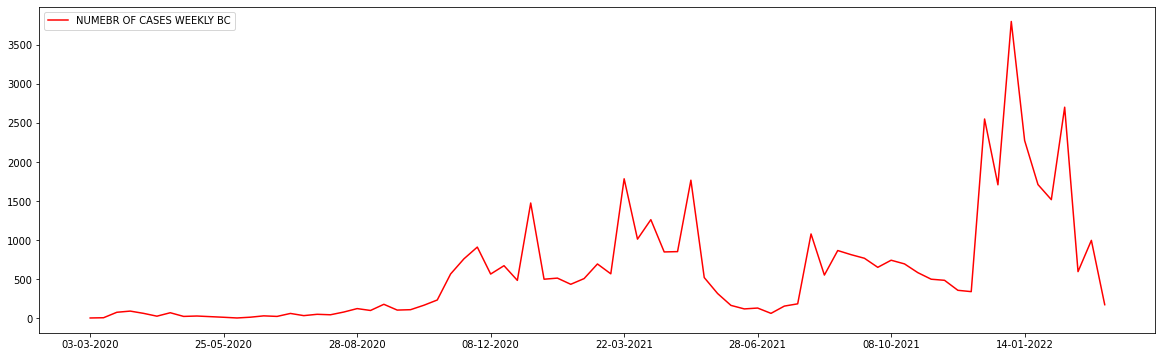

In [12]:
y = cases_df[0:-1:7]
weekly = y.rename(columns={"NUMBER OF CASES BC": "NUMEBR OF CASES WEEKLY BC"})
weekly.plot(figsize= (20,6), color="red")

## First step spilit data to Train and Test 
it's important to consider we cannot split data to train/test randomly. In time series data we need to consider a random point of the time and everything before that time consider as train and everything after that point consider as test 

In [13]:
# we consider the first split_percentage of size of the dataset as training
SPLIT_PERC = 0.7  
split_size = int(SPLIT_PERC * len(cases_df))
time_span_train = dates[:split_size]
num_case_train = cases[:split_size]
x_train, y_train  = time_span_train, num_case_train
x_test, y_test = dates[split_size:], cases[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(375, 161, 375, 161)

C:\Users\hamid\AppData\Local\Temp\ipykernel_7116\2778730608.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


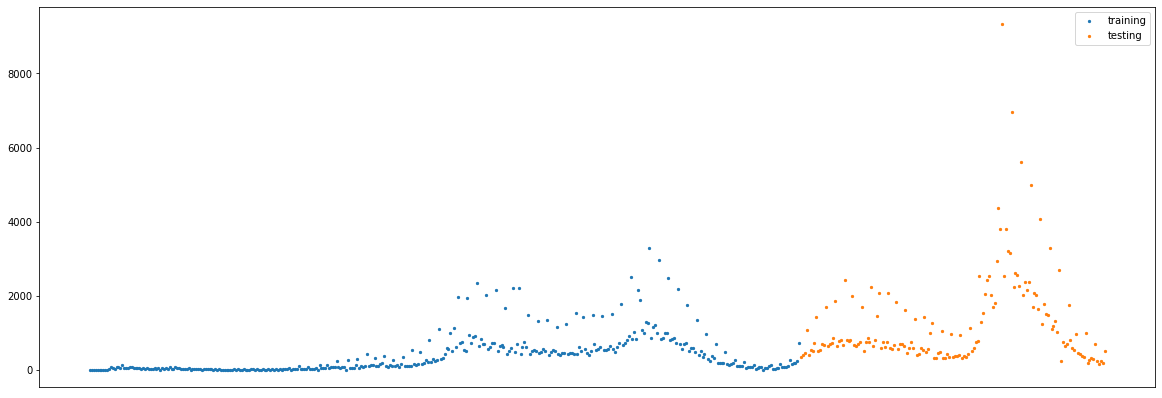

In [14]:
plt.figure(figsize=(20,7))
plt.scatter(x=x_train, y=y_train, s=5, label = "training")
plt.scatter(x=x_test, y=y_test, s=5, label = "testing")
plt.legend()
plt.xticks([])
plt.show()

# Turn time seris to supervised learning by windowing (preprocessing)

In [15]:
# Need a function to create a window and horizon 
# window_size is the number of days of data that we consider and horizon is the number of days that we want to predict. 
# Tensorflow make our job easier, by offereing tf.keras.utils.timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator
# These functions take in a sequence of data-points gathered at equal intervals, along with time series parameters such 
# as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of timeseries inputs and targets.

In [16]:
# so for the review we have data (cases), and dates(time) as: 
dates[0:7], cases[0:7], len(dates), len(cases), type(dates), type(cases)

(['03-03-2020',
  '04-03-2020',
  '05-03-2020',
  '07-03-2020',
  '09-03-2020',
  '10-03-2020',
  '11-03-2020'],
 [4, 1, 8, 6, 5, 7, 7],
 536,
 536,
 list,
 list)

In [17]:
import tensorflow as tf 
from keras.preprocessing.sequence import TimeseriesGenerator
# """
# tf.keras.utils.timeseries_dataset_from_array(
#     data, targets, sequence_length, sequence_stride=1, sampling_rate=1,
#     batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None)
# """

# need to turn data to numpy array 
inputs   = np.array(dates)
labels = np.array(cases)

# we want to predict next day cases, by considerting past 7 days.
dataset = TimeseriesGenerator(labels, labels, length=7, shuffle=False, stride=1, batch_size=1)


In [18]:
dataset

In [19]:
# The first 10 windows 
for i in range(10): 
    print(dataset[i])

(array([[4, 1, 8, 6, 5, 7, 7]]), array([7]))
(array([[1, 8, 6, 5, 7, 7, 7]]), array([11]))
(array([[ 8,  6,  5,  7,  7,  7, 11]]), array([9]))
(array([[ 6,  5,  7,  7,  7, 11,  9]]), array([30]))
(array([[ 5,  7,  7,  7, 11,  9, 30]]), array([83]))
(array([[ 7,  7,  7, 11,  9, 30, 83]]), array([45]))
(array([[ 7,  7, 11,  9, 30, 83, 45]]), array([40]))
(array([[ 7, 11,  9, 30, 83, 45, 40]]), array([77]))
(array([[11,  9, 30, 83, 45, 40, 77]]), array([76]))
(array([[ 9, 30, 83, 45, 40, 77, 76]]), array([48]))


In [20]:
# the last 10 windows ! 
for i in range (10): 
    print(dataset[i-10])

(array([[200, 274, 336, 288, 689, 237, 174]]), array([240]))
(array([[274, 336, 288, 689, 237, 174, 240]]), array([199]))
(array([[336, 288, 689, 237, 174, 240, 199]]), array([506]))
(array([], shape=(1, 0), dtype=int32), array([4]))
(array([], shape=(1, 0), dtype=int32), array([1]))
(array([], shape=(1, 0), dtype=int32), array([8]))
(array([], shape=(1, 0), dtype=int32), array([6]))
(array([], shape=(1, 0), dtype=int32), array([5]))
(array([], shape=(1, 0), dtype=int32), array([7]))
(array([], shape=(1, 0), dtype=int32), array([7]))


In [21]:
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])

In [22]:
# Create training and testing dataset by spliting the Windows ! 

def train_test_splits(data, target, split_rate = 0.2): 
    """
        Split data (Windows ) and target(Numebr of cases) 
        to training and testing datasets!
    
    """
    split_size = int(len(data) * (1-split_rate))

    train_windows = data[:split_size]
    train_labels = target[:split_size]
    test_windows  = data[split_size :]
    test_lables = target[split_size:]

    return tf.squeeze(train_windows), tf.squeeze(test_windows), tf.squeeze(train_labels), tf.squeeze(test_lables)

train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)


## PREDICTION WITH ML ALGORITHMS 

In [23]:
# SAVE different models! 
import os

# Create a ModelCheckpoint callback  
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [24]:
# Create ML models --> Basic to Complicated !
# First just one dense layer with 128 nodes

import tensorflow as tf 
from keras.models import Sequential
from keras import layers

# Random seed for regenarating 
tf.random.set_seed(42)

HORIZON = 1 # Want to find the number of cases in the next day 
#Model_1 
model_1  = Sequential([    
    layers.Dense(128),
    layers.Activation("relu"), 
    layers.Dense(HORIZON, tf.keras.activations.linear)
], name="model_1")

# Complie the model 
model_1.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model 
model_1.fit(x=train_windows, y=train_labels, 
            batch_size=128, epochs=100, validation_data=(test_windows, test_lables),callbacks=[create_model_checkpoint(model_name=model_1._name)])


Epoch 1/100
4/4 [==============================] - 1s 259ms/step - loss: 267.0105 - mae: 267.0105 - val_loss: 641.3583 - val_mae: 641.3583
Epoch 2/100
4/4 [==============================] - 0s 159ms/step - loss: 204.2528 - mae: 204.2528 - val_loss: 604.6833 - val_mae: 604.6833
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 200.2662 - mae: 200.2662 - val_loss: 612.7458 - val_mae: 612.7458
Epoch 4/100
4/4 [==============================] - 1s 213ms/step - loss: 196.3774 - mae: 196.3774 - val_loss: 574.8389 - val_mae: 574.8389
Epoch 5/100
4/4 [==============================] - 0s 154ms/step - loss: 182.1920 - mae: 182.1920 - val_loss: 533.4592 - val_mae: 533.4592
Epoch 6/100
4/4 [==============================] - 0s 137ms/step - loss: 176.7593 - mae: 176.7593 - val_loss: 522.3516 - val_mae: 522.3516
Epoch 7/100
4/4 [==============================] - 0s 154ms/step - loss: 174.8251 - mae: 174.8251 - val_loss: 508.0966 - val_mae: 508.0966
Epoch 8/100
4/4 [===========

In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Evaluate on the test data 
model_1 = tf.keras.models.load_model('model_experiments/model_1')
model_1.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 2ms/step - loss: 324.9377 - mae: 324.9377


[324.9377136230469, 324.9377136230469]

In [27]:
# We want to predict the numebr of covid cases based on the model that we trained

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [28]:
# The model predicition for the test set 
pred = make_preds(model=model_1, input_data = test_windows)


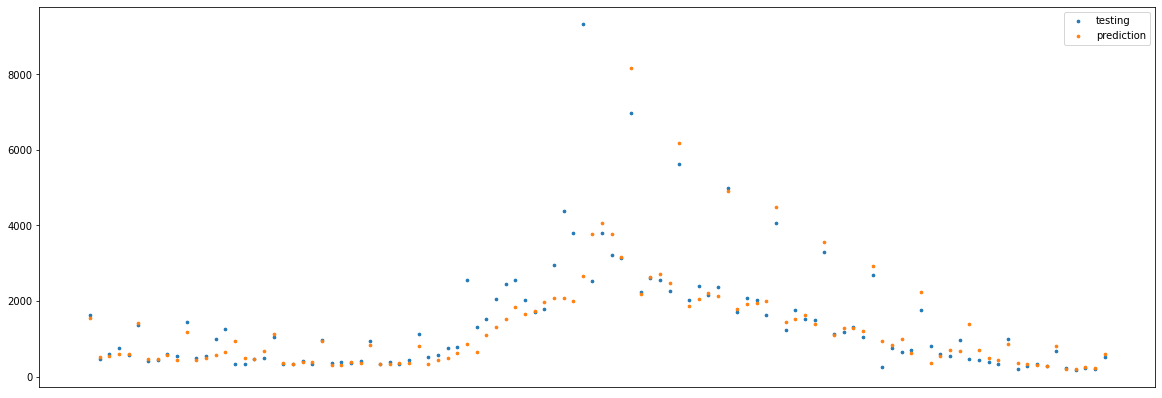

In [29]:
# Lets plot the performance of model_1 predicition compare to the test set 
x = []
for i in range(len(test_lables)):
    x.append(i)

plt.figure(figsize=(20,7))
plt.scatter(x=x, y=test_lables, s=7, label = "testing")
plt.scatter(x=x, y=pred, s=7, label = "prediction")
plt.legend()
plt.xticks([])
plt.show()

The time series that we have is autocorrelated, it means the value in t+1 is quite close to the value in time t 

In [30]:
# Second model this time instead of 7 days we consider windows with size of 30 days 
dataset = TimeseriesGenerator(labels, labels, length=30, shuffle=False, stride=1, batch_size=1)
# Data is ready with windows of 30 days 
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])

# Train, Test split 
train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)

# Create model_1 with new input data 
HORIZON = 1 # Want to find the number of cases in the next day 
model_2  = Sequential([    
    layers.Dense(128),
    layers.Activation("relu"), 
    layers.Dense(HORIZON, tf.keras.activations.linear)
], name="model_2")

# Complie the model 
model_2.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model 
model_2.fit(x=train_windows, y=train_labels, 
            batch_size=128, epochs=100, validation_data=(test_windows, test_lables), callbacks=[create_model_checkpoint(model_name=model_2._name)])


Epoch 1/100
4/4 [==============================] - 1s 186ms/step - loss: 459.1555 - mae: 459.1554 - val_loss: 988.3067 - val_mae: 988.3067
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 270.7538 - mae: 270.7538 - val_loss: 1147.5432 - val_mae: 1147.5432
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 301.5383 - mae: 301.5383 - val_loss: 1122.6267 - val_mae: 1122.6267
Epoch 4/100
4/4 [==============================] - 0s 130ms/step - loss: 276.4442 - mae: 276.4442 - val_loss: 850.7119 - val_mae: 850.7119
Epoch 5/100
4/4 [==============================] - 0s 133ms/step - loss: 225.5173 - mae: 225.5173 - val_loss: 684.2313 - val_mae: 684.2313
Epoch 6/100
4/4 [==============================] - 0s 132ms/step - loss: 222.0263 - mae: 222.0263 - val_loss: 634.5125 - val_mae: 634.5125
Epoch 7/100
4/4 [==============================] - 0s 145ms/step - loss: 204.2552 - mae: 204.2552 - val_loss: 586.7268 - val_mae: 586.7268
Epoch 8/100
4/4 [==========

In [31]:
model_2 = tf.keras.models.load_model('model_experiments/model_2')
model_2.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 2ms/step - loss: 471.6659 - mae: 471.6659


[471.6659240722656, 471.6659240722656]

# Long Short-Term Memory (LSTM) for learning sequential data 

In [32]:
# For this model, we consider WINDOWS=7 and HORIZON = 1 (consider number of covid cases for 1 week and predict the next day). 
HORIZON = 1 
WINDOW = 7
dataset = TimeseriesGenerator(labels, labels, length=WINDOW, shuffle=False, stride=1, batch_size=1) 
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])
train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)


In [33]:
np.shape(train_windows), np.shape(train_labels), np.shape(test_windows), np.shape(test_lables)

(TensorShape([423, 7]),
 TensorShape([423]),
 TensorShape([106, 7]),
 TensorShape([106]))

In [46]:
# https://www.tensorflow.org/tutorials/structured_data/time_series 
# LSTM layers take data with this shape [batch, timesteps, feature].

tf.random.set_seed(42)  # regeneration
from keras.layers import LSTM, Dense

inputs = layers.Input(shape=WINDOW)
x = tf.expand_dims(inputs, axis= 1)     #Reshape the input layer to 3D layer (NONE, 1, 7)
x = LSTM(128, activation="relu", return_sequences=True)(x)
x = LSTM(128, activation="relu")(x)
x = Dense(128)(x)
output = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs=inputs, outputs=output, name="model_3")

# compile the model 
model_3.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),metrics = ['mae'])

#Fit the model 
model_3.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100,
            validation_data=(test_windows, test_lables),callbacks=[create_model_checkpoint(model_name=model_3._name)])

model_3.summary

Epoch 1/100
1/4 [======>.......................] - ETA: 5s - loss: 458.0432 - mae: 458.0432INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 5s 935ms/step - loss: 464.7634 - mae: 464.7634 - val_loss: 1321.0077 - val_mae: 1321.0077
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 488.3758 - mae: 488.3758INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 905ms/step - loss: 419.7440 - mae: 419.7440 - val_loss: 1124.9830 - val_mae: 1124.9830
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 331.1350 - mae: 331.1350INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 1s/step - loss: 333.7027 - mae: 333.7027 - val_loss: 741.6038 - val_mae: 741.6038
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 260.1189 - mae: 260.1189INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 855ms/step - loss: 232.4262 - mae: 232.4262 - val_loss: 632.8472 - val_mae: 632.8472
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 228.9987 - mae: 228.9987INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 825ms/step - loss: 207.9702 - mae: 207.9702 - val_loss: 485.5846 - val_mae: 485.5846
Epoch 6/100
1/4 [======>.......................] - ETA: 0s - loss: 145.2858 - mae: 145.2858INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 918ms/step - loss: 160.2184 - mae: 160.2184 - val_loss: 384.3862 - val_mae: 384.3862
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 129.5100 - mae: 129.5100 - val_loss: 385.1788 - val_mae: 385.1788
Epoch 8/100
4/4 [==============================] - 0s 39ms/step - loss: 125.3137 - mae: 125.3137 - val_loss: 411.3826 - val_mae: 411.3826
Epoch 9/100
1/4 [======>.......................] - ETA: 0s - loss: 130.6806 - mae: 130.6806INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 913ms/step - loss: 123.2748 - mae: 123.2748 - val_loss: 382.3240 - val_mae: 382.3240
Epoch 10/100
1/4 [======>.......................] - ETA: 0s - loss: 117.6076 - mae: 117.6076INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 903ms/step - loss: 113.7584 - mae: 113.7584 - val_loss: 371.4540 - val_mae: 371.4540
Epoch 11/100
1/4 [======>.......................] - ETA: 0s - loss: 144.8462 - mae: 144.8462INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 1s/step - loss: 112.4783 - mae: 112.4783 - val_loss: 351.8144 - val_mae: 351.8144
Epoch 12/100
4/4 [==============================] - 0s 19ms/step - loss: 107.3480 - mae: 107.3480 - val_loss: 353.8560 - val_mae: 353.8560
Epoch 13/100
1/4 [======>.......................] - ETA: 0s - loss: 109.1384 - mae: 109.1384INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 874ms/step - loss: 108.6151 - mae: 108.6151 - val_loss: 349.2975 - val_mae: 349.2975
Epoch 14/100
1/4 [======>.......................] - ETA: 0s - loss: 111.2114 - mae: 111.2114INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 1s/step - loss: 100.7817 - mae: 100.7817 - val_loss: 343.4004 - val_mae: 343.4004
Epoch 15/100
4/4 [==============================] - 0s 17ms/step - loss: 97.8881 - mae: 97.8881 - val_loss: 363.8857 - val_mae: 363.8857
Epoch 16/100
1/4 [======>.......................] - ETA: 0s - loss: 83.3789 - mae: 83.3789INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 723ms/step - loss: 97.4138 - mae: 97.4138 - val_loss: 334.2144 - val_mae: 334.2144
Epoch 17/100
1/4 [======>.......................] - ETA: 0s - loss: 81.4192 - mae: 81.4192INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 755ms/step - loss: 95.2036 - mae: 95.2036 - val_loss: 314.6605 - val_mae: 314.6605
Epoch 18/100
4/4 [==============================] - 0s 18ms/step - loss: 97.7255 - mae: 97.7255 - val_loss: 384.7649 - val_mae: 384.7649
Epoch 19/100
4/4 [==============================] - 0s 20ms/step - loss: 91.2725 - mae: 91.2725 - val_loss: 323.7250 - val_mae: 323.7250
Epoch 20/100
4/4 [==============================] - 0s 23ms/step - loss: 94.5429 - mae: 94.5429 - val_loss: 338.2537 - val_mae: 338.2537
Epoch 21/100
4/4 [==============================] - 0s 22ms/step - loss: 96.0719 - mae: 96.0719 - val_loss: 320.3328 - val_mae: 320.3328
Epoch 22/100
4/4 [==============================] - 0s 20ms/step - loss: 91.9539 - mae: 91.9539 - val_loss: 329.7413 - val_mae: 329.7413
Epoch 23/100
4/4 [==============================] - 0s 21ms/step - loss: 93.2950 - mae: 93.2950 - val_loss: 328.1431 - val_mae: 328.1431
Epoch 24/100
4/4 [==============================] - 0

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 762ms/step - loss: 82.7223 - mae: 82.7223 - val_loss: 308.6847 - val_mae: 308.6847
Epoch 56/100
4/4 [==============================] - 0s 19ms/step - loss: 85.0568 - mae: 85.0568 - val_loss: 341.7549 - val_mae: 341.7549
Epoch 57/100
4/4 [==============================] - 0s 17ms/step - loss: 79.5306 - mae: 79.5306 - val_loss: 363.7761 - val_mae: 363.7761
Epoch 58/100
4/4 [==============================] - 0s 18ms/step - loss: 77.2948 - mae: 77.2948 - val_loss: 326.2432 - val_mae: 326.2432
Epoch 59/100
4/4 [==============================] - 0s 21ms/step - loss: 72.7744 - mae: 72.7744 - val_loss: 353.2063 - val_mae: 353.2063
Epoch 60/100
4/4 [==============================] - 0s 27ms/step - loss: 72.3799 - mae: 72.3799 - val_loss: 336.3235 - val_mae: 336.3235
Epoch 61/100
4/4 [==============================] - 0s 25ms/step - loss: 68.6253 - mae: 68.6253 - val_loss: 359.6848 - val_mae: 359.6848
Epoch 62/100
4/4 [==============================] - 0

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 985ms/step - loss: 64.9979 - mae: 64.9979 - val_loss: 305.1650 - val_mae: 305.1650
Epoch 82/100
4/4 [==============================] - 0s 26ms/step - loss: 65.7496 - mae: 65.7496 - val_loss: 339.5037 - val_mae: 339.5037
Epoch 83/100
4/4 [==============================] - 0s 21ms/step - loss: 69.2638 - mae: 69.2638 - val_loss: 362.8264 - val_mae: 362.8264
Epoch 84/100
4/4 [==============================] - 0s 20ms/step - loss: 68.0376 - mae: 68.0376 - val_loss: 351.9137 - val_mae: 351.9137
Epoch 85/100
4/4 [==============================] - 0s 21ms/step - loss: 71.1390 - mae: 71.1390 - val_loss: 355.4057 - val_mae: 355.4057
Epoch 86/100
4/4 [==============================] - 0s 23ms/step - loss: 70.3741 - mae: 70.3741 - val_loss: 311.6452 - val_mae: 311.6452
Epoch 87/100
4/4 [==============================] - 0s 24ms/step - loss: 71.6322 - mae: 71.6322 - val_loss: 362.5742 - val_mae: 362.5742
Epoch 88/100
4/4 [==============================] - 0

<bound method Model.summary of <keras.engine.functional.Functional object at 0x00000165E3C33AF0>>

In [47]:
model_3 = tf.keras.models.load_model('model_experiments\model_3')
model_3.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 3ms/step - loss: 305.1651 - mae: 305.1651


[305.1650695800781, 305.1650695800781]

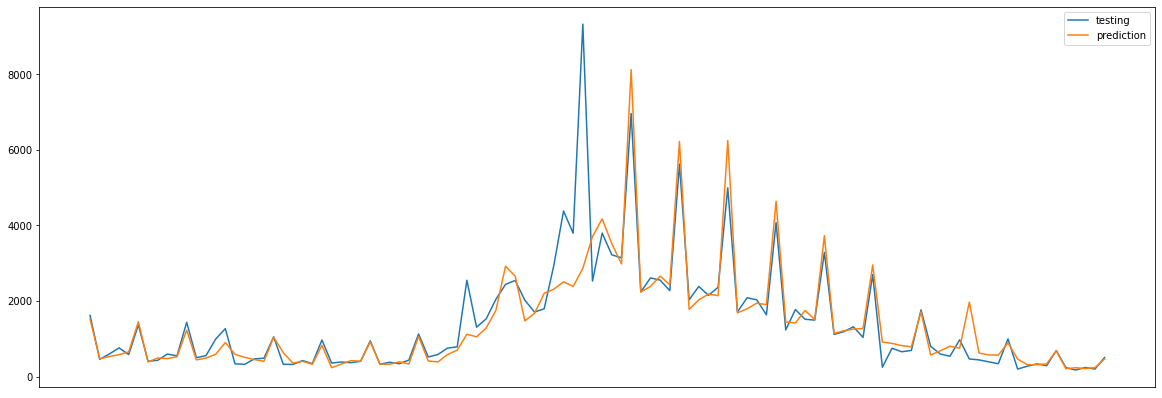

In [48]:
y_pred = model_3.predict(test_windows)
x = []
for i in range(len(test_lables)):
    x.append(i)
plt.figure(figsize=(20,7))
plt.plot(test_lables, label = "testing")
plt.plot(y_pred, label =  "prediction" )
plt.legend()
plt.xticks([])
plt.show()